In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
from google.colab import files
uploaded = files.upload()

Saving titanic_dataset (1).csv to titanic_dataset (1) (3).csv


In [59]:
data = pd.read_csv('titanic_dataset (1).csv')

In [60]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Make ‘PassengerId’ as the index column

In [75]:
data = pd.read_csv('titanic_dataset (1).csv', index_col='PassengerId')

In [76]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [64]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
data.drop("Cabin",axis=1,inplace=True)
data.drop("Embarked",axis=1,inplace=True)

MISSING VALUE

In [82]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [83]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [84]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

Check and handle outliers

Text(0.5, 1.0, 'Box plot of Pclass')

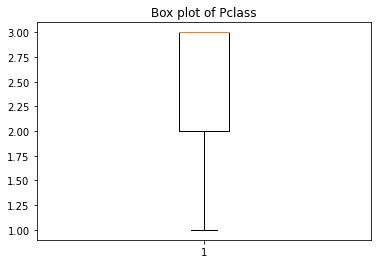

In [88]:
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

Text(0.5, 1.0, 'Box plot of Age')

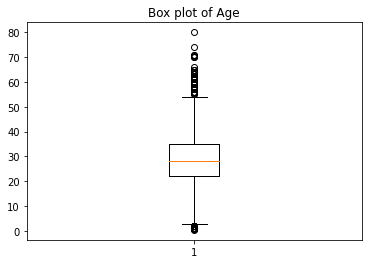

In [89]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [90]:
Q1 = np.percentile(data['Age'], 25 ,interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50 ,interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75 ,interpolation='midpoint')

In [91]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [92]:
data['Age'].median()

28.0

In [93]:
IQR = Q3-Q1

In [95]:
print(IQR)

13.0


In [98]:
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [99]:
print(low_limit)
print(up_limit)

2.5
54.5


In [105]:
outlier = []
for x in data['Age']:
  if(x>up_limit) or (x<low_limit):
    outlier.append(x)

In [106]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [107]:
ind2 = data['Age']>up_limit

In [108]:
data.loc[ind2].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [109]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,830, 852, 880],inplace=True)

In [110]:
ind2 = data['Age']<low_limit

In [111]:
data.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [112]:
data.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

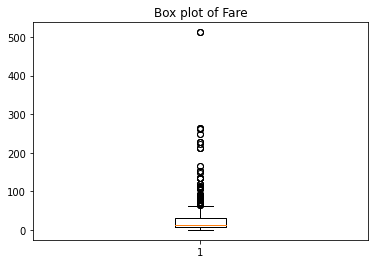

In [114]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [115]:
Q1 = np.percentile(data['Fare'], 25 ,interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50 ,interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75 ,interpolation='midpoint')

In [116]:
print(Q1)
print(Q2)
print(Q3)

7.8958
13.4167
30.0708


In [118]:
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print(up_limit)
print(low_limit)

63.333299999999994
-25.366699999999994


In [119]:
outlier = []
for x in data['Age']:
  if(x>up_limit) or (x<low_limit):
    outlier.append(x)

In [121]:
outlier

[]

MIN MAX SCALING

In [125]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [133]:
data1 = data.drop(['Name','Sex','Ticket'], axis=1)

In [134]:
data1

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,28.0,1,2,23.4500


In [135]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
minmax = MinMaxScaler()

In [146]:
X1 = minmax.fit_transform(data1)

In [147]:
type(X1)

numpy.ndarray

In [149]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare'],
      dtype='object')

In [151]:
X1=pd.DataFrame(X1,columns=['Survived','Pclass','Age','SibSp','Parch','Fare'])

In [152]:
X1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,0.380606,0.670909,0.500297,0.063485,0.059596,0.061452
std,0.485830,0.412048,0.199554,0.136334,0.133100,0.097508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.372549,0.000000,0.000000,0.015412
50%,0.000000,1.000000,0.490196,0.000000,0.000000,0.026188
75%,1.000000,1.000000,0.607843,0.125000,0.000000,0.058694
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,0.380606,2.341818,28.515152,0.507879,0.357576,31.483615
std,0.485830,0.824096,10.177256,1.090670,0.798599,49.956429
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.416700
75%,1.000000,3.000000,34.000000,1.000000,0.000000,30.070800
max,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200
